# Scikit-Learn

[Link to Homepage](https://scikit-learn.org/stable/tutorial/index.html)

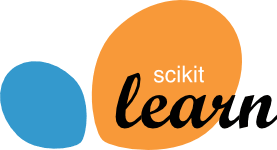

Scikit-Learn is an open-source python library that facilitates many types of both Supervised and Unsupervised Machine Learning algorithms. It is based on libraries and packages such as NumPy, SciPy, Sympy, Matplotlib, and Pandas.

There are many models in Scikit-Learn used for data modelling. Some of the examples are Classification, Regression, Clustering, etc.

This Jupyter notebook contains a demonstration of the following algorithms.

1. Random Forest Classification 
2. Linear Regression 
3. K-means Clustering

***

<br>

# 1. Random Forest Classification Algorithm

Classification models belong to Supervised Machine Learning. We give input data with several features and expect the model to divide those records into specific categories. Since this is a Supervised Machine Learning model, we first feed some train data with features and marked categories. Then the model predicts the categories for the test data.

Data used here is from wine quality data set in https://archive.ics.uci.edu/ml/index.php.

Two datasets include red and white vinho verde wine samples from the north of Portugal. The model should decide the wine quality based on several characteristics.

Let us first look at what Random Forest Classification Algorithm does.

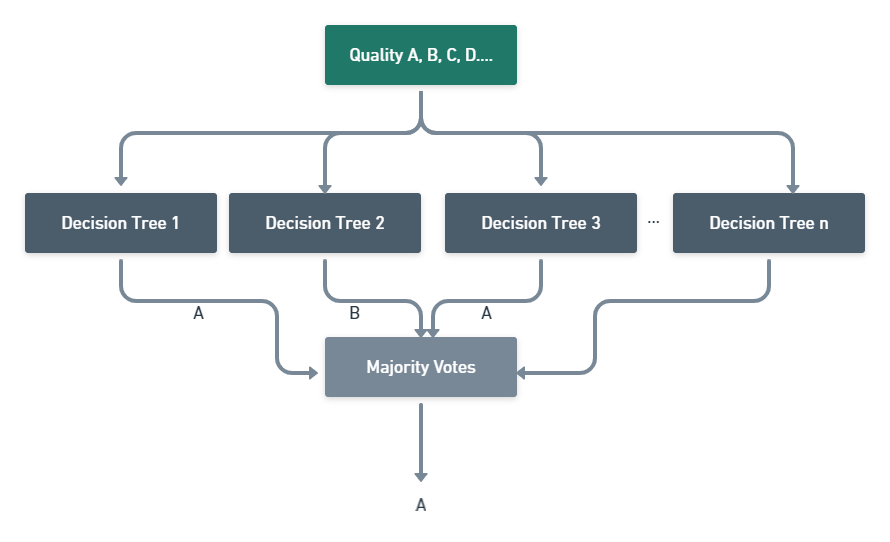

As shown in the above image, this model consists of decision trees that will decide the Quality of each record according to their calculations(Decision Tree 1 selects A, Decision Tree 2 selects B, ....). Final Decision is based on the majority of votes, which is, in this case, A.

<br>

## Set up

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns


In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Importing Data 

In [3]:
# Importing Red Wine data set and setting isRed to 1
df1= pd.read_csv('data/winequality-red.csv', sep=";")
df1["isRed"] = 1  

In [4]:
# Importing White Wine data set and setting isRed to 0
df2 = pd.read_csv('data/winequality-white.csv', sep=";")
df2["isRed"] = 0

In [5]:
# Combining both red wine data set and white wine data set.
df=pd.concat([df1, df2])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Data Visualization

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

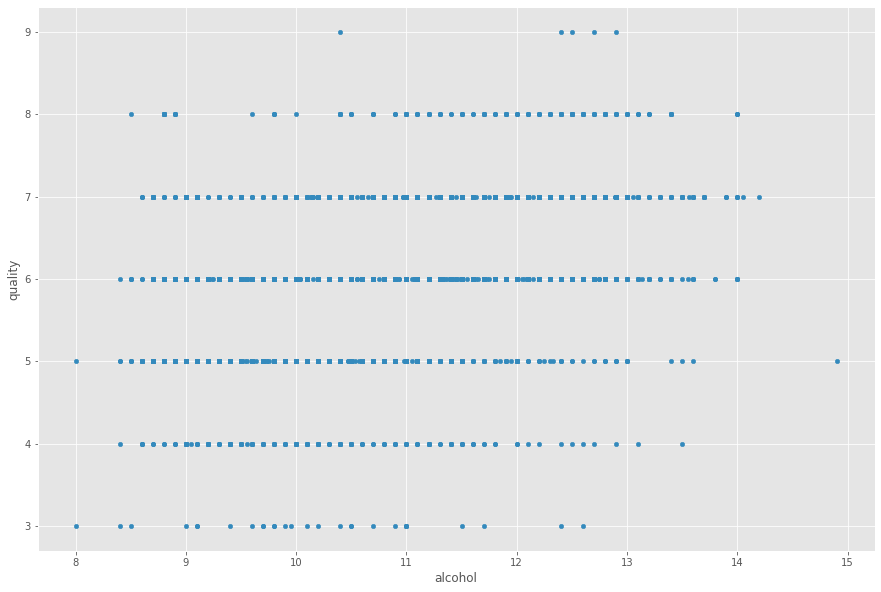

In [6]:
# Plot quality against alcohol quantity
df.plot.scatter(x = 'alcohol', y = 'quality')

Text(0, 0.5, 'quality')

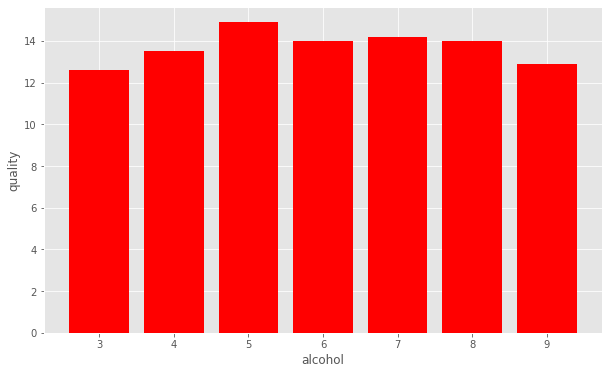

In [7]:
plt.figure(figsize=[10,6])
# Plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# Label x-axis
plt.xlabel('alcohol')
# Label y-axis
plt.ylabel('quality')

## Statistics

In [8]:
# Grouping by quality
x = df.groupby('quality')

In [9]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,isRed
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0.333333
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,0.245370
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,0.318522
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,0.224965
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,0.184430
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,0.093264
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,0.000000


## Relationship between the features

<AxesSubplot:>

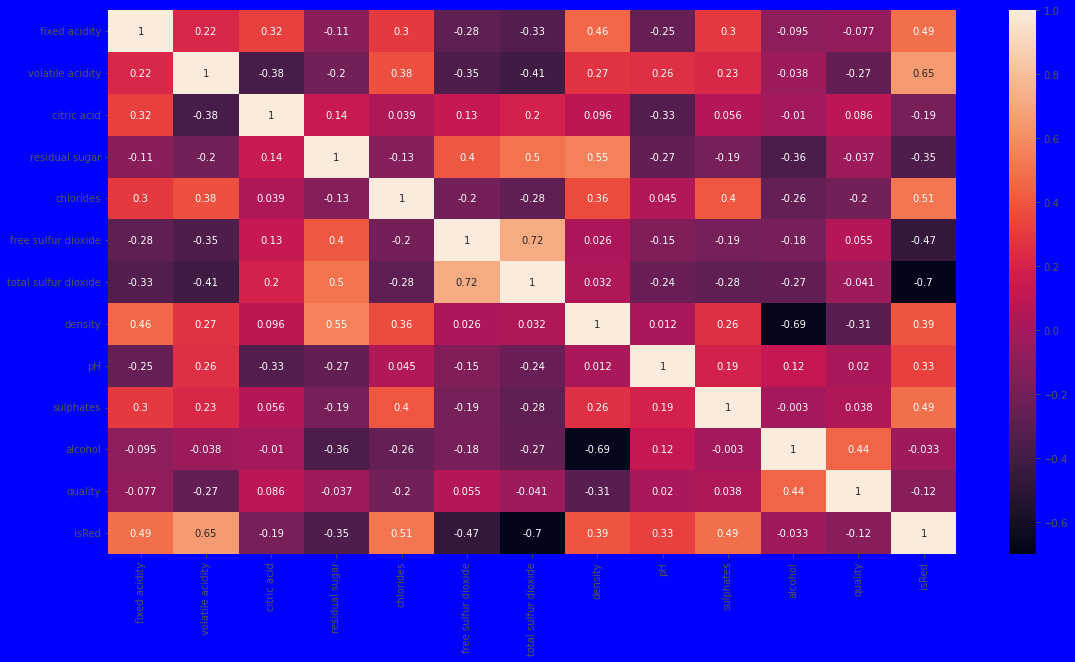

In [10]:
# Ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

The feature which affects the quality most is alcohol as its value is 0.44

## Preparing Train & Test Data Sets

In [11]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
isRed                   0
dtype: int64

In [12]:
# Fill those null values, in the above case there are no null values
df.update(df.fillna(df.mean()))

In [13]:
# For catogerical values 
df = pd.get_dummies(df,drop_first=True)

In [14]:
# If quality>= 7 considering it has good quality
df["best quality"] = [ 1 if x>=7 else 0 for x in df.quality] 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [15]:
# See proportion of good quality vs bad quality wines, there should be a good proportion
df['best quality'].value_counts()

0    5220
1    1277
Name: best quality, dtype: int64

In [16]:
# Separate feature variables and target variable
x = df.drop(['quality','best quality', 'isRed'], axis = 1)
y = df['best quality']

In [17]:
# Standarize the data set(mean=0, standard deviation=1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [18]:
# Split the data set for cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

## Random Forest Classification

In [19]:
# Applying the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# No of trees by default is 100
model1 = RandomForestClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
score1 =model1.score(x_test,y_test)
print('score of model is : ',score1)
                         
print(classification_report(y_test,y_pred1))

score of model is :  0.8812307692307693
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1292
           1       0.77      0.60      0.67       333

    accuracy                           0.88      1625
   macro avg       0.84      0.78      0.80      1625
weighted avg       0.88      0.88      0.88      1625



In [20]:
# Difference between actual value and predicted value
predicted_df = {'predicted_values': y_pred1, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(10)

,predicted_values,original_values
4136,1,0
3230,0,0
4376,0,0
714,0,0
4882,0,0
3699,0,0
1499,0,0
1347,0,1
1917,0,0
291,0,0


<AxesSubplot:>

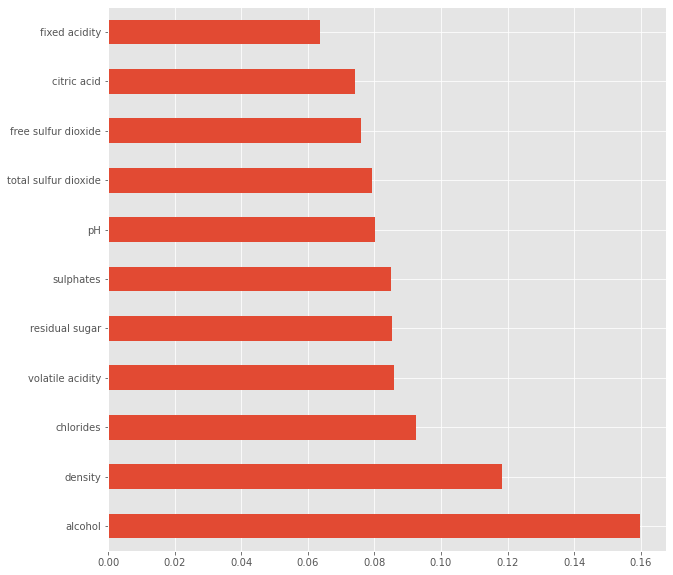

In [21]:
# Feature Importance given by the model
feat_importances = pd.Series(model1.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Let's check the socre of the model when no of decision trees in the model increases

In [22]:
# Applying the model, No of trees is set to 200
model_new = RandomForestClassifier(n_estimators=200,random_state=1)
model_new .fit(x_train, y_train)
y_pred_new = model_new .predict(x_test)
score_new =model_new .score(x_test,y_test)
print('score of model is : ',score_new )
                         
print(classification_report(y_test,y_pred_new))

score of model is :  0.8824615384615384
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1292
           1       0.77      0.61      0.68       333

    accuracy                           0.88      1625
   macro avg       0.84      0.78      0.80      1625
weighted avg       0.88      0.88      0.88      1625



We can see that the score of the model increases when number of decision trees in the forest increases.

*** 

<br>

# 2. Linear Regression Algorithm

Linear Regression is a supervised machine learning algorithm. The primary purpose of this algorithm is to suggest the best fit line for a given set of data points. It is based on a relationship between x(independent variable) and y(dependent variable), which can be demonstrated in a linear equation as y=mx+c where m is the coefficient and c is the intercept.

For the demonstration of this algorithm data from https://www.scribbr.com/statistics/simple-linear-regression/ is used. Data includes two variables as income and happiness. 

## Set Up 

In [23]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [24]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Importing Data

In [25]:
# Importing data set
data= pd.read_csv('data/income.data.csv', sep=",")
#drop the first column
ds=data.drop(data.columns[[0]], axis=1)

In [26]:
# Display data
ds.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


## Data Statistics & Graphs

In [27]:
# Statistical Data
ds.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


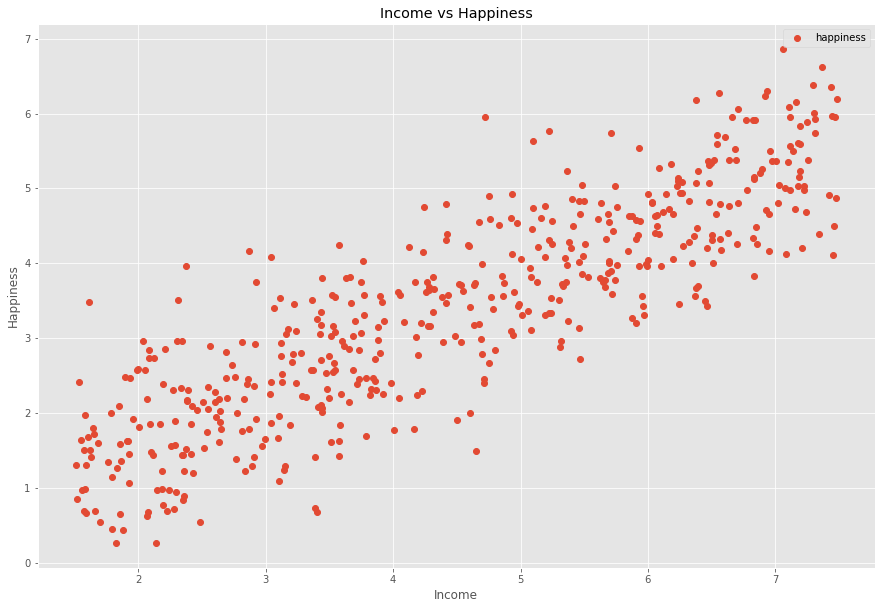

In [28]:
# Plotting data points in a graph
ds.plot(x='income', y='happiness', style='o')
plt.title('Income vs Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

## Preparing data sets

In [29]:
# Separate feature variables and target variable
x = ds.drop(['happiness'], axis = 1)
y = ds['happiness']
x.head(),y.head()

(     income
 0  3.862647
 1  4.979381
 2  4.923957
 3  3.214372
 4  7.196409,
 0    2.314489
 1    3.433490
 2    4.599373
 3    2.791114
 4    5.596398
 Name: happiness, dtype: float64)

In [30]:
# Split data set in to training and testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Here I have used LinearRegression model from scikit-learn to find the best fit line for the data set for two instances.

1. When Intercept is 0
2. When Intercept is not 0

### When Intercept is euqal to  0

In [31]:
# Applying the model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=False)
model1.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [32]:
# Score
model1.score(x_test, y_test)

0.6624853282667105

In [33]:
# Coefficient of predicted data
model1.coef_

array([0.75073516])

In [34]:
# Intercept of predicted data
model1.intercept_

0.0

Graph for the best line and data points in test data set are as below.

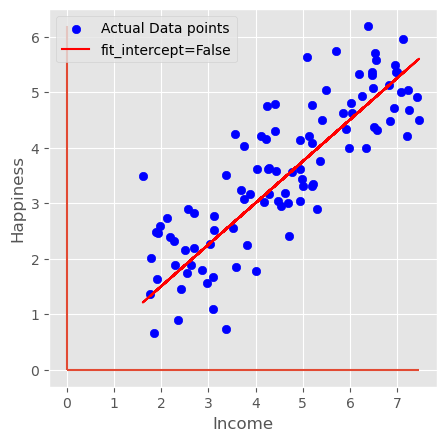

In [35]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(x_test, y_test, label='Actual Data points', color ='b')
# Intercept=0
y_values = np.dot(x_test, model1.coef_) + model1.intercept_
plt.plot(x_test, y_values, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y_test.max())
plt.hlines(0, 0, x_test.max())
plt.xlabel('Income')
plt.ylabel('Happiness')
  
plt.show()

In [36]:
# Actual and predicted y values
y_pred=model1.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
90,1.775933,3.004845
254,1.877147,1.982953
283,2.465761,1.449805
443,1.560355,2.226674
336,0.898733,1.771365


In [37]:
# Mean squared error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.7735995158125573

### When Intercept is not euqal to 0

In [38]:
# Applying the model
from sklearn.linear_model import LinearRegression
# By default fit_intercept is set to True
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [39]:
# Score
model2.score(x_test, y_test)

0.6707424110276093

We can see that the score of the model when fit_intercept is set to True is higher than score of the model when fit_intercept is set to False. This is obvious, because we force the model to make intercept 0 in the first case 

In [40]:
# Coefficient of predicted data
model2.coef_

array([0.72564448])

In [41]:
# Intercept of predicted data
model2.intercept_

0.12876507637843781

Graph for the best line and data points in test data set are as below.

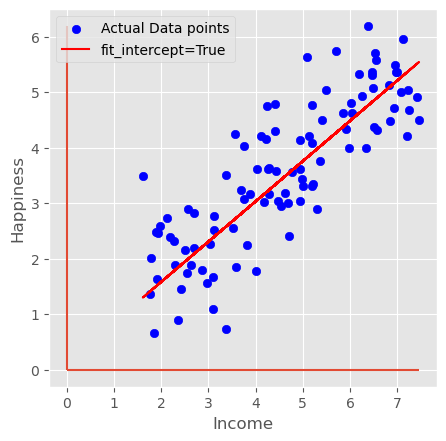

In [42]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(x_test, y_test, label='Actual Data points', color ='b')
#intercept=0
y_values = np.dot(x_test, model2.coef_) + model2.intercept_
plt.plot(x_test, y_values, 'r-', label='fit_intercept=True')
plt.legend()

plt.vlines(0, 0, y_test.max())
plt.hlines(0, 0, x_test.max())
plt.xlabel('Income')
plt.ylabel('Happiness')
  
plt.show()

In [43]:
# Actual and predicted y values
y_pred=model2.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
90,1.775933,3.033184
254,1.877147,2.045445
283,2.465761,1.530116
443,1.560355,2.281021
336,0.898733,1.840929


In [44]:
# Mean Suqared Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.7640781102437704

*** 

<br>

# 3. K-Means Clustering Algorithm

K-means Clustering is an unsupervised machine learning algorithm. We can use it to identify data patterns and divide them into groups of similar characteristics. Data points in one cluster are identical to other data points in that cluster and vary from data points in the rest of the clusters.

The below figure demonstrates how data points in a graph are clustered. 

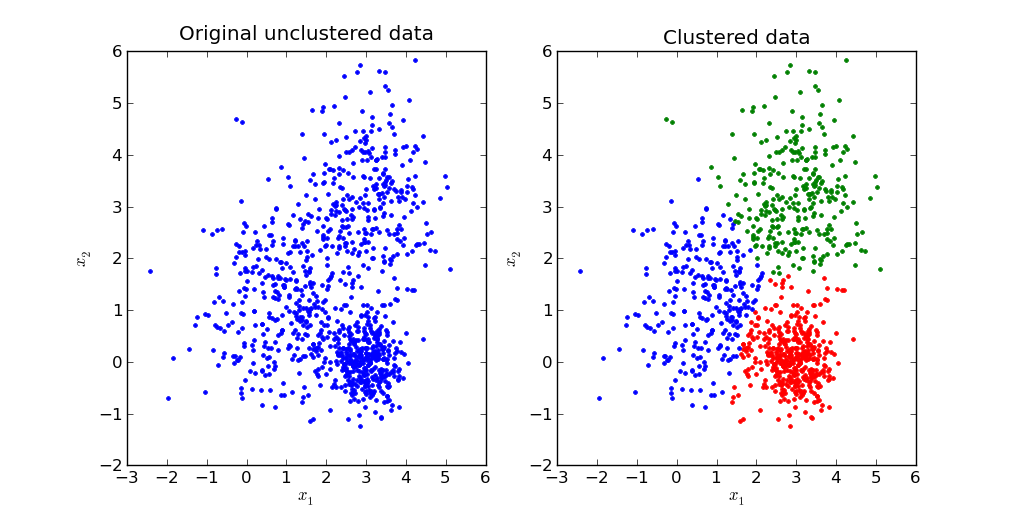

Image is adapted from https://towardsdatascience.com/k-means-data-clustering-bce3335d2203.

Let's see how K-means algorithm works. 

## Set up

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


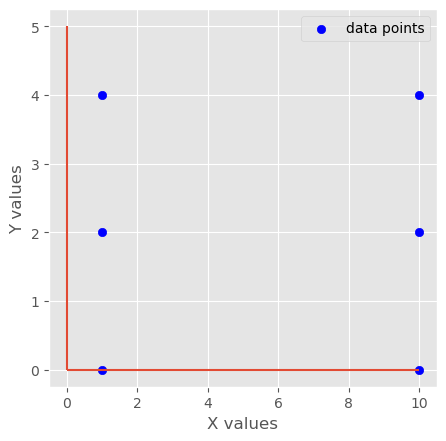

In [46]:
# Data points
x = [1,1,1,10,10,10]
y = [2,4,0,2,4,0]

# Display in a graph
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(x, y, color='blue',label='data points')
plt.legend()
plt.vlines(0, 0, 5)
plt.hlines(0, 0, 10)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

Here I have taken 6 data points in to consideration.

### Step 1

Pick k number of points randomly, to place k centroids.

I have chosen two centroids which are shown in red color in the graph.

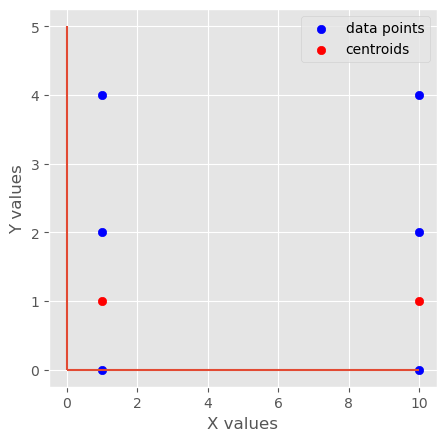

In [47]:
x = [1,1,1,10,10,10]
y = [2,4,0,2,4,0]

x1=[1,10]
y1=[1,1]

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(x, y, color='blue',label='data points')
plt.scatter(x1,y1,color= 'red', label='centroids')

plt.legend()
plt.vlines(0, 0, 5)
plt.hlines(0, 0, 10)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()


### Step 2

Assign each data point to the closest centroid.

According to that (1, 2), (1, 4), (1, 0) belong to (1,1) and (10, 2), (10, 4), (10, 0) belong to (10,2).

### Step 3

Take average of all the points in each cluster to find the centre of those clusters(cenre of mass). Move the centoid to that point.

For (1, 2), (1, 4), (1, 0) sum of all points is (3,6) and average after dividing by 3 is (1,2). Therefore cente of mass is (1,2).

For (10, 2), (10, 4), (10, 0) sum of all points is (30,6) and average after dividing by 3 is (10,2). Therefore cente of mass is (10,2).

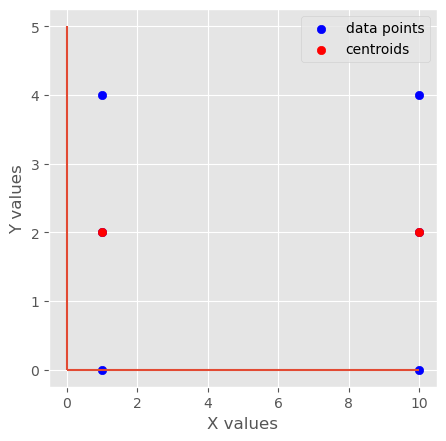

In [48]:
x = [1,1,1,10,10,10]
y = [2,4,0,2,4,0]

x1=[1,10]
y1=[2,2]

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(x, y, color='blue',label='data points')
plt.scatter(x1,y1,color= 'red', label='centroids')

plt.legend()
plt.vlines(0, 0, 5)
plt.hlines(0, 0, 10)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

### Step 4

Assign each data point to the closest centroid again. In this case, the clusters will not change. We can see (1,2) and (10,2) are the centre of two clusters in the above graph.

### Step 5

Repeat steps 3-4 so that clusters will remain unchanged.

We can decide which cluster a new data point belongs to by assigning it to the cluster with the closest centroid. According to the above example, if we are given the data point (2,1), we can see that the closest centroid is (1,2). Therefore it belongs to the same cluster as (1, 2), (1, 4), (1, 0).

K-Means Clustering model is used to analyse the Iris data set below.

## Set up

In [49]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Helper functions.
import sklearn.model_selection as mod

# Statistical plots.
import seaborn as sns

%matplotlib inline

## Importing Data

In [50]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here I will take only 2 columns(sepal_width and sepal_length) in to consideration

## Data Visualization

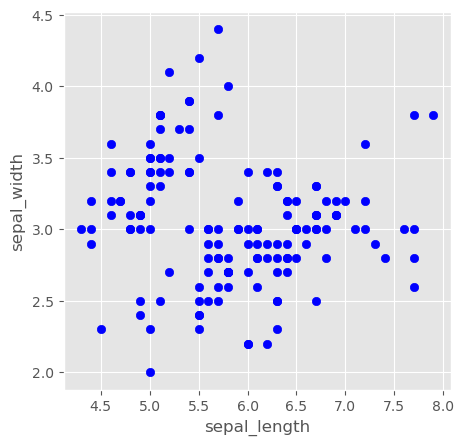

In [52]:
X = df[["sepal_length","sepal_width"]]
#Visualise data points
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.scatter(X["sepal_length"],X["sepal_width"],c='blue')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [53]:
X.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


Since the variance of data here is less, data will not be transformed

## K-Means Clustering

In [54]:
# Applying the model
from sklearn.cluster import KMeans
    
kmeans_model = KMeans(n_clusters=2, init='k-means++')
kmeans_model.fit(X)

KMeans(n_clusters=2)

In [55]:
# Prediction of clusters
predict=kmeans_model.predict(X)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

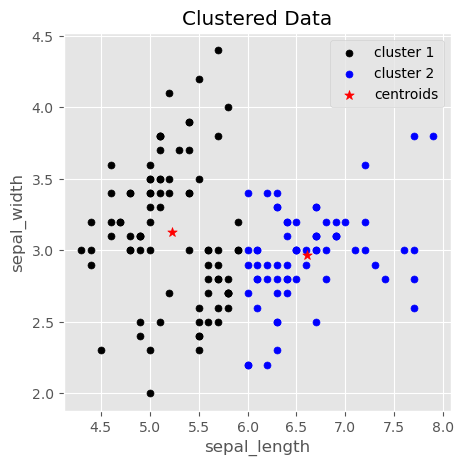

In [56]:
# Return centroids
centroids = kmeans_model.cluster_centers_

# Plotting in a graph
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
X = np.array(X) 

# Clusters
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s=25, c='black', label='cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s=25,c='blue', label='cluster 2')
# Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50,c='red', label='centroids')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clustered Data')
plt.show()

We already know that the Iris data set has three groups. So let's set the number of centroids to 3. The best way to find out the  that using Inertia and Elbow Method.

In [57]:
# Applying the model
from sklearn.cluster import KMeans
kmeans_model2 = KMeans(n_clusters=3, init='k-means++')
kmeans_model2.fit(X)
predict2=kmeans_model2.predict(X)
predict2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

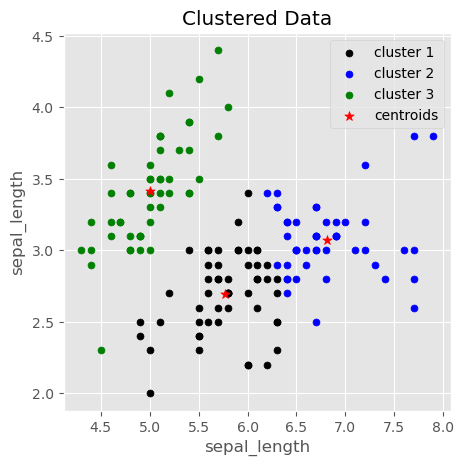

In [58]:
# Return centroids
centroids = kmeans_model2.cluster_centers_

# Plotting in a graph
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
X = np.array(X) 

# Clusters
plt.scatter(X[predict2 == 0, 0], X[predict2 == 0, 1], s=25, c='black', label='cluster 1')
plt.scatter(X[predict2 == 1, 0], X[predict2 == 1, 1], s=25, c='blue', label='cluster 2')
plt.scatter(X[predict2 == 2, 0], X[predict2 == 2, 1], s=25, c='green', label='cluster 3')

# Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50,c='red', label='centroids')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_length')
plt.title('Clustered Data')
plt.show()

In [59]:
# Index of the cluster each sample belongs to
kmeans_model2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)